In [98]:
# @title  Screens Ratios

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

%matplotlib inline
px2inch = 1/plt.rcParams['figure.dpi']

bins_edges [-5.25 -4.75 -4.25 -3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25
  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75]
bins_centers [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5] 

Freq Height sum: 1.0
PDF Area [-5,5]: 0.9999994266968562
PDF Sum Heights: 49.89997285406798


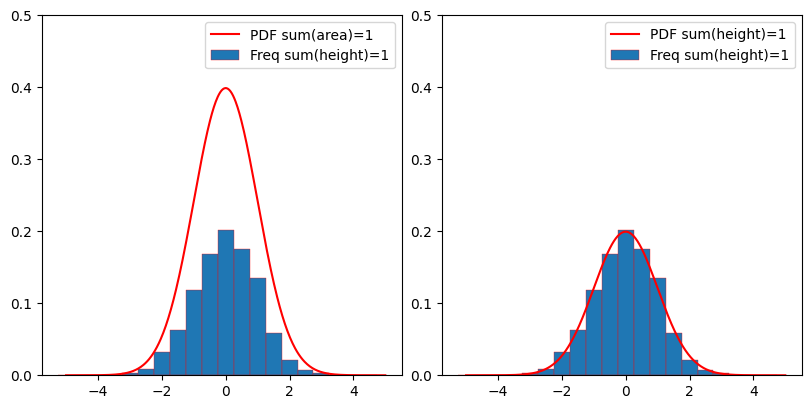

In [103]:
def get_frecs(edges,x):
    n     = x.size
    freq  = []
    freqn = []
    for i in range(edges.size-1):
        e1   = edges[i  ]
        e2   = edges[i+1]
        indx = np.logical_and (x>=e1, x<e2 ) 
        
        if np.sum(indx)>0:
           freqn.append(  x[indx].size/n )
           freq.append(   np.sort(x[indx]) )
        else:
           freqn.append( 0 )
           freq.append( 0 )

    return freqn,freq

PDF_x        = np.linspace(-5,5,500)
PDF_binw     = np.diff(PDF_x)[0]
x            = np.random.randn(1000)
bins_width   = 0.5
bins_edges   = np.arange(-5-bins_width/2,5+bins_width/2,bins_width)
bins_centers = bins_edges[:-1]+bins_width/2
fn,f         = get_frecs(bins_edges,x)
normal       = lambda x : 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2)
PDF          = normal(PDF_x)
PDF_area,e   = integrate.quad(normal, -5, 5)
PSF_binw     = np.diff(PDF)[0]

print(f'bins_edges {bins_edges}')
print(f'bins_centers {bins_centers} ')
print()
print(f'Freq Height sum: {np.sum(fn)}')
print(f'PDF Area [-5,5]: {PDF_area}')
print(f'PDF Sum Heights: {np.sum(PDF)}')

size_plot = 400
fig, ax4  = plt.subplots(1,2,constrained_layout=True,figsize=(2*size_plot*px2inch,size_plot*px2inch))
ax4[0].bar( bins_centers ,fn,width=bins_width,label='Freq sum(height)=1',edgecolor='r',lw=0.25);
ax4[0].plot(PDF_x,PDF,'r',label='PDF sum(area)=1');
ax4[0].set_box_aspect(1)
ax4[0].set_ylim(0,0.5)
ax4[0].legend()

ax4[1].bar( bins_centers ,fn,width=bins_width,label='Freq sum(height)=1',edgecolor='r',lw=0.25);
ax4[1].plot(PDF_x,PDF*bins_width ,'r',label='PDF sum(height)=1');
ax4[1].set_box_aspect(1)
ax4[1].set_ylim(0,0.5)
ax4[1].legend();


NBins: 11
 PDF_sum : 0.9999999931805308
 PDF_area: 0.9999999931805308
NBins: 21
 PDF_sum : 1.9999997719003562
 PDF_area: 0.9999998859501781
NBins: 100
 PDF_sum : 9.899995686339825
 PDF_area: 0.999999564276752
NBins: 500
 PDF_sum : 49.89997285406798
 PDF_area: 0.9999994559933585
NBins: 1000
 PDF_sum : 99.8999442013342
 PDF_area: 0.9999994414547965


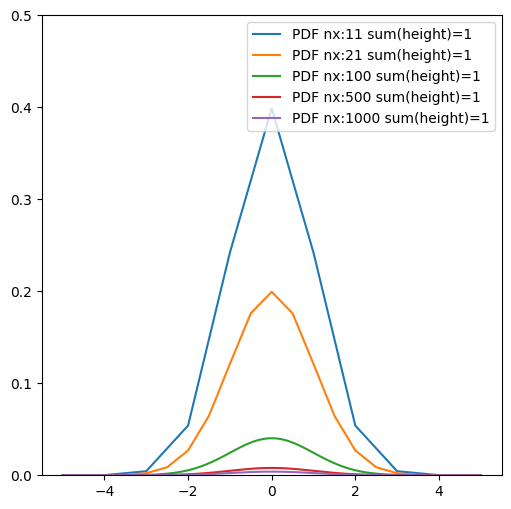

In [100]:
size_plot = 500
fig, ax5  = plt.subplots(1,1,constrained_layout=True,figsize=(size_plot*px2inch,size_plot*px2inch))

normal = lambda x : 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2)
for n in [11,21,100,500,1000]:
    PDF_x    = np.linspace(-5,5,n)
    PDF_binw = np.diff(PDF_x)[0]
    PDF      = normal(PDF_x)
    PDF_sum  = np.sum(PDF)
    PDF_area = np.sum( PDF*PDF_binw ) 
    
    print(f'NBins: {n}')
    print(f' PDF_sum : {PDF_sum}')
    print(f' PDF_area: {PDF_area}')

    ax5.plot(PDF_x,PDF*PDF_binw,label=f'PDF nx:{n} sum(height)=1');
    ax5.set_box_aspect(1)
    ax5.set_ylim(0,0.5)
    ax5.legend()

In [101]:
def gauss(x,u,s):
    return np.sqrt(2*np.pi*s**2) * np.exp(-(x-u)**2/ (2*s**2) )

array([ 1.16068836e+00,  2.74399590e-15, -2.05554047e+00, -1.27478395e-16,
        1.50341754e+00])

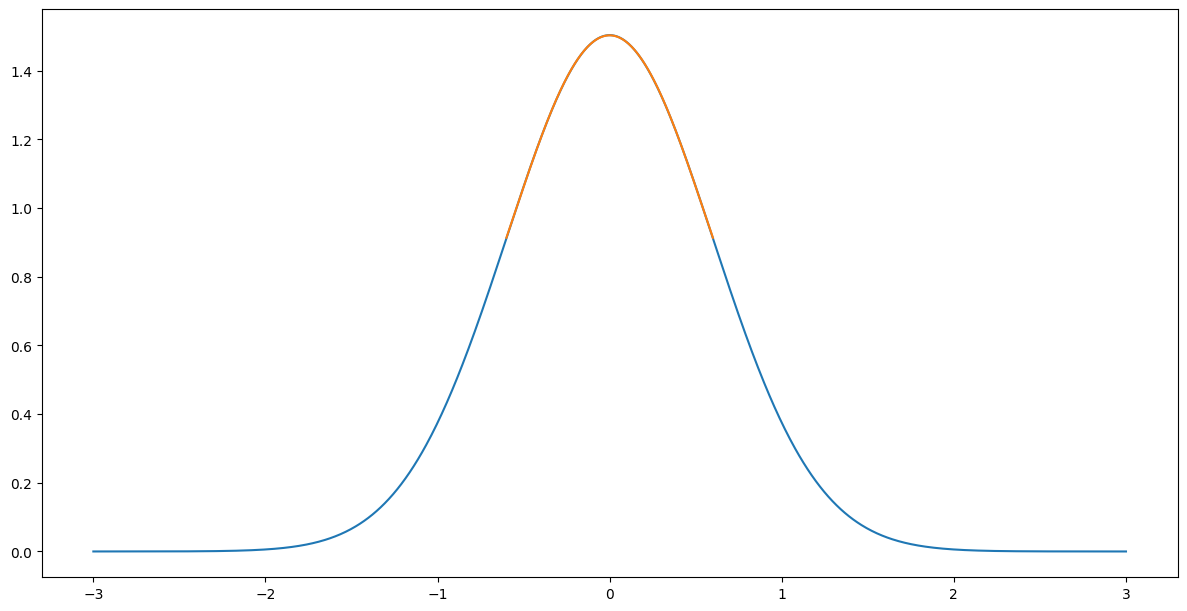

In [102]:
u = 0
s = 0.6
x = np.linspace(u-s,u+s,1000)
y = gauss(x,u,s)
p = np.polyfit(x,y,4)
size_plot = 600
fig, ax5  = plt.subplots(1,1,constrained_layout=True,figsize=(2*size_plot*px2inch,size_plot*px2inch))


xx = np.linspace(-3,3,1000)
yy = np.polyval(p, x)

ax5.plot(xx,gauss(xx,u,s))
ax5.plot(x,yy)
ax5.set_box_aspect(0.5)
p